In [1]:
import sys

print("--sys.version—-")
print(sys.version)

--sys.version—-
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# test environment

# Python version: 3.8.5
# Anaconda version: 4.9.2

# I recommend the (re)installation of anaconda in case of error.
# how to install: www.anaconda.com > product > individual edition > 3.8 version graphical installer download

In [3]:
from collections import Counter
import pandas as pd
import numpy as np
import math
import statistics
import re

# basic information

# the number of value presented
value_num = 15

# value_label

directory = r"C:\Users\문기홍\Dropbox\대학원\6. Python_file"
tag = pd.read_excel("{}\\tag_name.xlsx".format(directory), sheet_name= 'Sheet1')
tag['tag3'] = tag.apply(lambda x: "("+x['tag1']+") "+x['event'], axis=1)

value_label = dict(zip(tag.event, tag.value_label))
value_label_eng = dict(zip(tag.value_label, tag.value_label_eng))
value_group = dict(zip(tag.value_label, tag.tag0))

title_tag1 = dict(zip(tag.value_label, tag.tag3))
title_tag2 = dict(zip(tag.value_label, tag.tag2))

In [4]:
tag['value_label_eng']

0                saving_energy
1            greenhouse_gases 
2             renewable_energy
3              waste_reduction
4              water_pollution
5              hiring_disabled
6           workplace_accident
7            work-life_balance
8     symbiotic_subcontracting
9           caring_communities
10             board_diversity
11             anti-corruption
12      transparent_disclosure
13                fair_rewards
14               global_issues
Name: value_label_eng, dtype: object

In [4]:
testraw = pd.read_excel("{}\\ESGame-20210531.xlsx".format(directory))

In [5]:
testraw.groupby(["info5"]).count().reset_index()

,info5,id,uid,info1,info2,info3,info4,info6,info7,info8,...,ar23,ac23,al24,ar24,ac24,al25,ar25,ac25,as2,create_dt
0,1934,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1936,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2,1938,3,2,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,1,3
3,1939,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,0,3
4,1942,5,3,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2006,4,0,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,0,4
69,2008,2,0,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,2
70,2009,2,0,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,2
71,2010,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [6]:
testraw.groupby(["info5"]).count().reset_index().to_csv("{}\\아이고.csv".format(directory), sep=',', na_rep='.', encoding = 'utf_8_sig')

### Part 1: preprocessing raw.csv to wide-formatted data

In [4]:
## raw.dta 파일을 pandas로 불러오기
# raw.dta가 있는 파일 위치 설정 및 불러오기

#raw = pd.read_excel("{}\\DB_DEV_nc_temp_research_20210319-2.xlsx".format(directory))
raw = pd.read_excel("{}\\투자기업_필요기업_추가조사데이터.xlsx".format(directory))

# value_label
raw = raw.replace(value_label)

# np.nan을 ''으로 전처리
raw = raw.replace(np.nan, '', regex=True)

In [5]:
raw.groupby(["info4"]).count().reset_index()

,info4,id,uid,info1,info2,info3,info5,info6,info7,info8,...,ar23,ac23,al24,ar24,ac24,al25,ar25,ac25,as2,create_dt
0,1,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
1,2,1859,1859,1859,1859,1859,1859,1859,1859,1859,...,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859


In [6]:
## wide-form 자료를 long-form 자료로 변환

def wide_to_long(raw, k):
    columns_values = raw.columns.values.tolist()

    left = [i for i in columns_values if 'al'+str(k) in i]
    right = [i for i in columns_values if 'ar'+str(k) in i]
    answer = [i for i in columns_values if 'ac'+str(k) in i]

    HQ_L = list(pd.DataFrame(raw[left].unstack()).reset_index()[0])
    HQ_R = list(pd.DataFrame(raw[right].unstack()).reset_index()[0])
    A = list(pd.DataFrame(raw[answer].unstack()).reset_index()[0])

    my_dict = {"HQ_L": HQ_L, "HQ_R": HQ_R, "A": A}
    df = pd.DataFrame(my_dict)

    df['HQ_a'] = df.apply(lambda x : x['HQ_R'] if  x['HQ_L'] > x['HQ_R']  else x['HQ_L'] , axis = 1)
    df['HQ_b'] = df.apply(lambda x : x['HQ_R'] if  x['HQ_L'] < x['HQ_R']  else x['HQ_L'] , axis = 1)
    
    id_info = pd.DataFrame()
    info = raw.iloc[:, 0:13]
    i= 1
    while  i <= len(left):
        id_info = pd.concat([id_info, info])
        i += 1

    id_info = id_info.reset_index(drop=True)
    df = pd.concat([id_info, df], axis = 1)

    return df

In [39]:
### 데이터 선택
#df = wide_to_long(raw, 1) #투자하고 싶은 기업 
df = wide_to_long(raw, 2) #사회에 더 필요한 기업

### 엑셀 자동화 file_name ###
#file_name = "case1.xlsx"
file_name = "case2.xlsx"

#이하 분석과 동일하게 하기 위해 id를 NO로 이름 변경
df = df.rename({"id":"NO"}, axis=1) 

### Part 2. 선택 비율에 따라 t-test 만들기

In [40]:
## 전처리: drop duplicated rows in case of consistent answer
# 동일한 질문을 받아 같은 값을 대답한 경우 하나만 남기고 제거

df = df.drop_duplicates(["NO", "HQ_a", "HQ_b", "A"], keep='first')

In [41]:
## 전처리: drop duplicated rows in case of inconsistent respondent
# 동일한 질문을 받아 다른 값을 대답한 경우 '신뢰할 수 없는 응답자'로 분류, 그의 모든 대답을 제거

drop_resp = set(df["NO"][df.duplicated(["NO", "HQ_a", "HQ_b"], keep=False)])

for r in drop_resp:
    df = df.drop(df[df.NO == r].index)

In [42]:
# t-test 결과를 저장하기 위해 간소화
df_abb = df[["NO", "HQ_a", "HQ_b", "A"]]

# tabulate한 결과를 새로운 DataFrame으로 저장(tab), tab_tmp는 전체 표본 수(n)을 얻기 위한 장치
tab = df_abb.groupby(["HQ_a", "HQ_b", "A"]).count().reset_index()
tab_tmp = df_abb[["NO", "HQ_a", "HQ_b"]].groupby(["HQ_a", "HQ_b"]).count().reset_index()

tab = pd.merge(tab, tab_tmp, on=["HQ_a", "HQ_b"])
tab.rename(columns = {"NO_x":"choice_a", "NO_y":"N"}, inplace=True)

## p-value를 수준에 따라 별로 변환하는 함수

def p_value_star(num):
    if num < 0.001:
        return "***"
    elif num < 0.01:
        return "**"
    elif num < 0.05:
        return "*"
    else:
        return ""

## tab에 필요한 통계값을 추가하기: A 선택 비율, 표준오차, Z값, p-value, 유의도

tab["choice_p"] = tab.apply(lambda r: r.choice_a / r.N * 100, axis=1)
tab["SE"] = tab.apply(lambda r: math.sqrt(0.5 * (1-0.5) / r.N), axis=1)
tab["Z"] = tab.apply(lambda r: (r.choice_p / 100 - 0.5) / r.SE, axis=1)
tab["P"] = tab.apply(lambda r: (1 - statistics.NormalDist().cdf(abs(r.Z))) * 2, axis=1)
tab["star"] = tab.apply(lambda r: p_value_star(r.P), axis=1)
tab.reset_index(drop=True, inplace=True)

In [43]:
## 집단 수준에서 정리한 결과를 바탕으로 선택 비율 구하기
# (HQ_a, HQ_b) 조합이 unique하기 떄문에, HQ_a를 기준으로 비율을 합하기 위해 (HQ_b, HQ_a)를 추가함
# 예를 들어, (HQ_a, HQ_b, A):(1, 2, 1)이므로, (2, 1, 1)은 존재하지 않음. HQ_a를 기준으로 선택 비율의 평균을 구해야함

simple_p = tab.copy()
cols = simple_p.columns.tolist()

# simple_p_tmp가 (HQ_b, HQ_a) 순서를 바꾼 dataFrame
cols = ["HQ_b", "HQ_a"] + cols[2:] 
simple_p_tmp = simple_p[cols]
simple_p_tmp.rename(columns = {"HQ_b": "HQ_a", "HQ_a": "HQ_b"}, inplace=True)

frames = [simple_p, simple_p_tmp]
simple_p = pd.concat(frames)
simple_p.reset_index(inplace=True)

for index, row in simple_p.iterrows():
    if row["A"] != row["HQ_a"]:
        simple_p.at[index, "A"] = 0

In [44]:
# 선택 비율은 1 vs. 2, 1 vs. 3, ... 에서 각 비율의 평균값으로 구함
simple_p_tab = simple_p[["HQ_a", "A", "choice_p"]].groupby(["HQ_a", "A"]).mean().reset_index()
simple_p_tab.drop(simple_p_tab[simple_p_tab["A"] == 0].index, inplace=True)
simple_p_tab.drop(["A"], axis=1, inplace=True)
simple_p_tab = simple_p_tab.sort_values(["choice_p"], ascending=False).reset_index(drop=True)

In [45]:
# 각 가치의 단순 선택 비율을 표시
simple_p_tab

,HQ_a,choice_p
0,8,68.315601
1,7,61.108040
2,2,59.724238
3,9,58.075063
4,4,56.467170
5,3,56.344911
6,10,55.870496
7,14,52.246249
8,5,49.829953
9,12,46.400897


In [46]:
# 관계 중 유의한 것만 추려서 network로 그리기
tab_s = tab[(tab["Z"] > 0) & (tab["star"] != "")]

In [47]:
tab_s

,HQ_a,HQ_b,A,choice_a,N,choice_p,SE,Z,P,star
1,1,2,2,99,137,72.262774,0.042718,5.211582,1.872373e-07,***
3,1,3,3,99,128,77.343750,0.044194,6.187184,6.124834e-10,***
5,1,4,4,70,112,62.500000,0.047246,2.645751,8.150972e-03,**
7,1,5,5,81,127,63.779528,0.044368,3.105748,1.897985e-03,**
8,1,6,1,69,109,63.302752,0.047891,2.777696,5.474577e-03,**
...,...,...,...,...,...,...,...,...,...,...
191,11,12,12,67,109,61.467890,0.047891,2.394566,1.664006e-02,*
195,11,14,14,89,127,70.078740,0.044368,4.525518,6.024770e-06,***
197,11,15,15,80,137,58.394161,0.042718,1.965023,4.941162e-02,*
205,13,14,14,81,138,58.695652,0.042563,2.043016,4.105089e-02,*


In [48]:
# 관계 중 유의하지 않은 것만 추려서 network로 그리기
tab_ss = tab[(tab["Z"] > 0) & (tab["star"] == "")]

In [49]:
tab

,HQ_a,HQ_b,A,choice_a,N,choice_p,SE,Z,P,star
0,1,2,1,38,137,27.737226,0.042718,-5.211582,1.872373e-07,***
1,1,2,2,99,137,72.262774,0.042718,5.211582,1.872373e-07,***
2,1,3,1,29,128,22.656250,0.044194,-6.187184,6.124834e-10,***
3,1,3,3,99,128,77.343750,0.044194,6.187184,6.124834e-10,***
4,1,4,1,42,112,37.500000,0.047246,-2.645751,8.150972e-03,**
...,...,...,...,...,...,...,...,...,...,...
205,13,14,14,81,138,58.695652,0.042563,2.043016,4.105089e-02,*
206,13,15,13,59,116,50.862069,0.046424,0.185695,8.526837e-01,
207,13,15,15,57,116,49.137931,0.046424,-0.185695,8.526837e-01,
208,14,15,14,67,109,61.467890,0.047891,2.394566,1.664006e-02,*


In [19]:
import numpy
import matplotlib.pyplot as plt

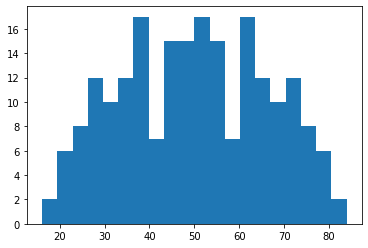

In [119]:
numpy.std(tab['choice_p'])
plt.hist(tab['choice_p'], bins=20)
plt.show()

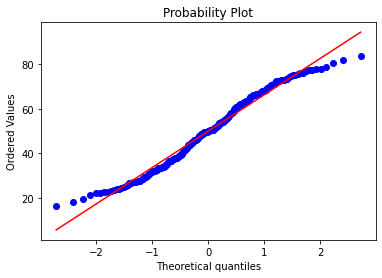

In [120]:
from scipy.stats import probplot
plt.figure()
probplot(tab['choice_p'], plot=plt)
plt.show()


In [121]:
from scipy import stats

stats.shapiro(tab['choice_p'])

ShapiroResult(statistic=0.9750510454177856, pvalue=0.0008756009046919644)

In [ ]:
#정규성을 따르네여

In [17]:
# (옵션) 필요한 경우에 csv 파일로 저장
tab.to_csv("{}\\t_test.csv".format(directory), sep=',', na_rep='.')
tab_s.to_csv("{}\\t_test_s.csv".format(directory), sep=',', na_rep='.')

### Part 3. t-test의 결과를 그래프로 그리기

In [20]:
## import: visualize tab_s relationship with networkx

%matplotlib inline

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [66]:
## 그래프의 node, edge 정보를 바탕으로 설정(input: DafaFrame, output: Graph)

def set_graph(tab_s):
    G = nx.DiGraph()

    # 노드 추가
    for i in range(1, value_num+1):
        G.add_node(i)

    # edge 추가(유의하게 선택 비율이 높은 가치 -> 낮은 가치)
    for index, row in tab_s.iterrows():
        if row["HQ_a"] == row["A"]:
            G.add_edge(row["HQ_a"], row["HQ_b"], weight=len(row["star"]))
        elif row["HQ_b"] == row["A"]:
            G.add_edge(row["HQ_b"], row["HQ_a"], weight=len(row["star"]))
    return G

In [18]:
def set_graph_rev(tab_s):
    G = nx.DiGraph()

    # 노드 추가
    for i in range(1, value_num+1):
        G.add_node(i)

    # edge 추가(유의하게 선택 비율이 낮은 가치 -> 높은 가치)
    for index, row in tab_s.iterrows():
        if row["HQ_b"] == row["A"]:
            G.add_edge(row["HQ_a"], row["HQ_b"], weight=len(row["star"]))
        elif row["HQ_a"] == row["A"]:
            G.add_edge(row["HQ_b"], row["HQ_a"], weight=len(row["star"]))
    return G

In [19]:
## 그래프의 outdegree를 바탕으로 각 노드의 위치(x, y 좌표)를 계산하기

def get_position(degree, value_num, jitter=5):

    tmp = list()
    tmp_set = list()
    
    # from dict to list
    for key, value in degree.items():
        tmp.append([key, value])
        if value not in tmp_set:
            tmp_set.append(value)
    
    # [7, 5, 1] -> [3, 2, 1] 순서로 변환(x 좌표)
    tmp_set = sorted(tmp_set, reverse=True)
    
    for i in range(value_num):
        tmp[i][1] = tmp_set.index(tmp[i][1])
    
    # 중복되는 값이 겹치지 않도록 y좌표 배정
    for i in range(value_num):
        order = 1
        dup = 0
        for j in range(value_num):
            if tmp[i][1] == tmp[j][1]:
                dup += 1
        for k in range(i+1, value_num):
            if tmp[i][1] == tmp[k][1]:
                order += 1
        tmp[i].append((dup-order+1)/(dup+1))
        tmp[i].append(jitter/dup)
    return tmp

In [20]:
## set_graph()로 설정한 그래프를 그리기
## outdegree 기준

def draw_graph(G, title="Companies for investment.", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=[v for v in degree.values()],
                           nodelist=degree.keys(), node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [21]:
## choice_p : 선택 비율 기준

def draw_graph2(G, title="Companies for investment", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [155]:
## 레이아웃 변경. pos
## 선택 비율 기준
def draw_graph3(G, title="Preference between Social Values", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = nx.shell_layout(G)
   
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=300)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plot.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

In [22]:
# 선택비율 기준
# value num 대신 value label
#"Companies that society needs" "Companies for investment"
def draw_graph4(G, title="Companies for investment", x_axis=None, save_option=False, labels=""):
    
    degree = dict(G.out_degree)
    tmp = get_position(degree, value_num)
    
    # pos(=position) = (x, y)
    pos = dict()
    if x_axis is None:
        for i in range(value_num):
            pos[i+1] = (tmp[i][1] + (random.random()-0.5) * 0.2, tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    else:
        for i in range(value_num):
            pos[i+1] = (float(x_axis[x_axis["HQ_a"] == i+1]["choice_p"]), tmp[i][2]*10 + (random.random()-0.5) * tmp[i][-1])
    
    # set network attributes
    nx.set_node_attributes(G, pos, 'pos')
    nx.draw_networkx_nodes(G, pos, node_color=simple_p_tab["choice_p"],
                           nodelist=simple_p_tab["HQ_a"], node_size=600)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, edge_color='black', width=1)
    nx.draw_networkx_labels(G, pos, value_label_eng, font_color='black', font_size=5)
    
    if labels != "":
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='grey')

    ax = plt.gca()
    ax.set_axis_off()
    plt.title(title, size=15)

    if save_option:
        plt.savefig("{}\\plotneeed.png".format(directory), facecolor='w', dpi=1000)

    plt.figure(figsize=(12, 10), dpi=300)
    plt.show()

### draw_graph ###

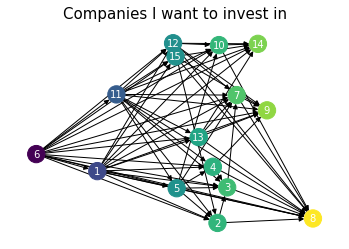

<Figure size 3600x3000 with 0 Axes>

In [24]:
#선택 비율 기준
# 유의한 경우
G = set_graph_rev(tab_s)
draw_graph2(G,x_axis=simple_p_tab, save_option=True)

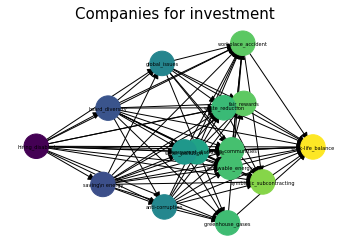

<Figure size 3600x3000 with 0 Axes>

In [95]:
#선택 비율 기준
# 유의한 경우
G = set_graph_rev(tab_s)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

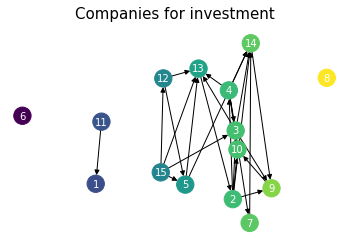

<Figure size 3600x3000 with 0 Axes>

In [97]:
#선택비율 기준
#유의하지 않은 경우
G = set_graph_rev(tab_ss)
draw_graph2(G,x_axis=simple_p_tab, save_option=True)

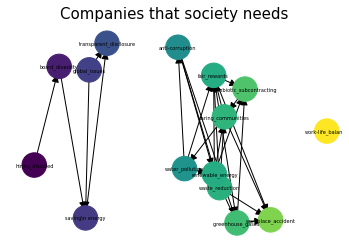

<Figure size 3600x3000 with 0 Axes>

In [157]:
#선택비율 기준
#유의하지 않은 경우
G = set_graph_rev(tab_ss)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

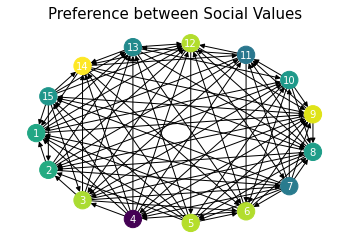

<Figure size 3600x3000 with 0 Axes>

In [94]:
## 선택 비율 기준
## 유의하지 않은 경우

G = set_graph_rev(tab_ss)
draw_graph3(G)

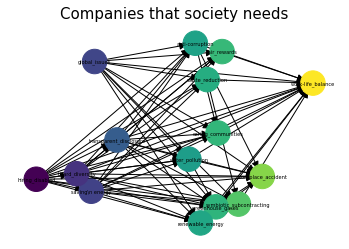

<Figure size 3600x3000 with 0 Axes>

In [24]:
G = set_graph_rev(tab_s)
draw_graph4(G,x_axis=simple_p_tab, save_option=True)

### Part 4. 로지스틱 회귀 분석 실행 후 그래프로 결과 그리기 

In [18]:
# 로지스틱 회귀 모델 임포트
import statsmodels.api as sm

In [50]:
# raw DataFrame을 필요한 변수 중심으로 정리
df.rename(columns = {"info1": "soc_val", "info2": "org_inv", "info3": "fun_inv", "info4": "gender", "info5": "age", "info6": "marital", 
                     "info7": "income", "info8": "educ", "info9": "partylr", "info10": "religion", "info11": "job",}, inplace=True)

df_a = df
# 테어난 해 -> 연령으로 변경
df_a['age'] = df_a.apply(lambda x : 2021-x['age']+1 , axis = 1)

#미혼/ 기혼, 이혼및사별
df_a['marital2'] = df_a['marital']
df_a.loc[df_a['marital2']==4, 'marital2'] = 3 

#무교및기타/ 개신교, 천주교, 불교
df_a['religion2'] = df_a.apply(lambda x : x['religion']+1 , axis = 1)
df_a.loc[(df_a['religion2']==5)|(df_a['religion2']==6), 'religion2'] = 1 

#무직(10 )/ 1,2차 생산업(1,2), 재화 및 서비스 유통업 (3,4,5), 전문업 및 부동산, 외국기관 (6,7,9), 공공,사회,개인 서비스업 (8)
df_a.loc[(df_a['job']==10), 'job2'] = 1
df_a.loc[(df_a['job']>=1)&(df_a['job']<=2), 'job2'] = 2
df_a.loc[(df_a['job']>=3)&(df_a['job']<=5), 'job2'] = 3
df_a.loc[(df_a['job']==6)|(df_a['job']==7)|(df_a['job']==9), 'job2'] = 4
df_a.loc[(df_a['job']==8), 'job2'] = 5 

df_a['marital'] = df_a['marital2']
df_a['religion'] = df_a['religion2']
df_a['job'] = df_a['job2']

# 전처리: income의 9. 소득 없음을 0으로 처리
df_a["income"].values[df_a["income"] == 9] = 0
df_a = df_a.sort_values(by=["HQ_a", "HQ_b", "A"], axis=0)

In [51]:
## 로지스틱 회귀 분석 실행 후 결과 리턴

def logistic_reg(i, j, df_a):
    small_df = df_a.loc[(df_a["HQ_a"] == i) & (df_a["HQ_b"] == j)]
    small_df["A"].values[small_df["A"] == i] = 1
    small_df["A"].values[small_df["A"] == j] = 0
        
    res = list()
    model = sm.GLM.from_formula("A ~  soc_val + org_inv + fun_inv + gender + age + income + educ + partylr + C(religion) + C(marital) + C(job)"
                                , family = sm.families.Binomial(), data=small_df)
    
    result = model.fit()
    range_n = len(result.params.keys())

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, j, i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [52]:
def logistic_reg2(i, df_a):
    small_df = df_a.loc[(df_a["HQ_a"] == i)|(df_a["HQ_b"] == i)]
    small_df["A"].values[small_df["A"] != i] = 0
    small_df["A"].values[small_df["A"] == i] = 1
    
    res = list()
    model = sm.GLM.from_formula("A ~ soc_val + org_inv + fun_inv + gender + age + income + educ + partylr + C(religion) + C(marital) + C(job)"
                                , family = sm.families.Binomial(), data=small_df)
    
    result = model.fit()
    range_n = len(result.params.keys())

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, "all_others", i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [53]:
def logistic_reg3(i, df_a):
    group_sub = ['E', 'S', 'G']
    
    df_a_tag = df_a.copy()
    df_a_tag['HQ_a'] = df_a_tag['HQ_a'].replace(value_group)
    df_a_tag['HQ_b'] = df_a_tag['HQ_b'].replace(value_group)
    df_a_tag['A'] = df_a_tag['A'].replace(value_group)
    
    small_df = df_a_tag.loc[(df_a_tag["HQ_a"] == i)|(df_a_tag["HQ_b"] == i)]
    small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
    small_df = small_df.loc[small_df['drop']==0, :]
    
    small_df["A"].values[small_df["A"] != i] = 0
    small_df["A"].values[small_df["A"] == i] = 1
   
    res = list()
    model = sm.GLM.from_formula("A ~ soc_val + org_inv + fun_inv + gender + age + income + educ + partylr + C(religion) + C(marital) + C(job)"
                                , family = sm.families.Binomial(), data=small_df)
    
    result = model.fit()
    range_n = len(result.params.keys())
    group_sub.remove(i)
    all_others = group_sub[0:]

    # result = [node A, node B, selected value, variable name, coef., p-value, stars]
    for k in range(1, range_n):
        res.append([i, all_others, i, result.params.keys()[k], result.params[k], result.pvalues[k], p_value_star(result.pvalues[k])])
    return res

In [54]:
## 가능한 모든 조합(예: 1 vs. 2)에 대해 로지스틱 회귀 분석 실행

res_all = list()
for i in range(1, value_num+1):
    for j in range(i+1, value_num+1):
        res_all.extend(logistic_reg(i, j, df_a))       

res_df = pd.DataFrame(res_all)
res_df.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Public\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


In [55]:
df_a.iloc[216:219, 10:62]

,partylr,religion,job,HQ_L,HQ_R,A,HQ_a,HQ_b,marital2,religion2,job2
6898,6,4,3.0,3,1,3,1,3,1,4,3.0
7162,5,1,3.0,3,1,3,1,3,2,1,3.0
7308,3,2,2.0,1,3,3,1,3,3,2,2.0


In [56]:
## 특정 경우 vs 그 외 모든 경우에 대한 비율 그래프
res_all = list()

for i in range(1, value_num+1):
        res_all.extend(logistic_reg2(i, df_a))

res_df2 = pd.DataFrame(res_all)
res_df2.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

In [29]:
# i가 항목별 숫자를 나타냅니다(15까지). i를 1부터 15까지 바꾸면서 각각의 결과를 노가다처럼 옮겨주시면 감사드리겠습니다.... df_a는 앞 부분 코드를 이미 실행시키면서 생성됨
i = 2

small_df = df_a.loc[(df_a["HQ_a"] == i)|(df_a["HQ_b"] == i)]
small_df["A"].values[small_df["A"] != i] = 0
small_df["A"].values[small_df["A"] == i] = 1
    
#여기가 회귀분석을 실시하는 부분입니다. 우리  코드 상에는 GLM을 사용하고 있는데요 제가 둘다 해보았더니 결과는 같은데 GLM 에서 Binomial 설정하고 logit을 하면 왠지 R값이 안나오더라고요..
res = list()
model = sm.Logit.from_formula("A ~ soc_val + org_inv + fun_inv + gender + age + income + educ + partylr + C(religion) + C(marital) + C(job)"
                            ,  data=small_df)
#사진에 있던 hello 어쩌구는 그냥 잘 되나 확인해본 코드이고 큰 의미는 없어서 아래처럼 바로 모델을 요약하면 됩니다.
result2 = model.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.676335
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      A   No. Observations:                 1679
Model:                          Logit   Df Residuals:                     1661
Method:                           MLE   Df Model:                           17
Date:                Tue, 18 Jan 2022   Pseudo R-squ.:                 0.01141
Time:                        14:38:58   Log-Likelihood:                -1135.6
converged:                       True   LL-Null:                       -1148.7
Covariance Type:            nonrobust   LLR p-value:                   0.07067
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0771      0.472     -0.163      0.870      -1.002       0.848
C(religion)

In [30]:
## 특정경우vs모든조합에 대한 비율 그래프group = ['E', 'S', 'G']
res_all = list()
group = ['E', 'S', 'G']
for i in group:
        res_all.extend(logistic_reg3(i, df_a))

res_df3 = pd.DataFrame(res_all)
res_df3.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]

<ipython-input-25-58a0adbd298f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
<ipython-input-25-58a0adbd298f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['drop'] = small_df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
<ipython-input-25-58a0adbd298f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [ ]:
res_df2[(res_df2["star"] != "")]

In [129]:
res_df[(res_df["star"] != "")]
#res_df.head()

,HQ_a,HQ_b,A,variable,coef,p_value,star
29,1,3,1,gender,-0.813299,0.017073,*
48,1,4,1,income,0.243436,0.028913,*
90,1,7,1,C(job)[T.2.0],-1.620660,0.024723,*
122,1,9,1,C(marital)[T.2],-0.790171,0.040101,*
142,1,10,1,C(job)[T.3.0],-1.344359,0.042260,*
...,...,...,...,...,...,...,...
1699,12,13,12,partylr,-0.167718,0.028754,*
1746,13,14,13,gender,-0.735001,0.015247,*
1774,14,15,14,C(job)[T.3.0],1.264146,0.042815,*
1781,14,15,14,age,0.054454,0.014453,*


In [27]:
## 위의 res_df와 달리, 선택 비율의 차이가 유의하지 않은 경우만 따로 저장
tab_ns = tab[(tab["Z"] > 0) & (tab["star"] == "")]

In [131]:
tab_ns.head()

,HQ_a,HQ_b,A,choice_a,N,choice_p,SE,Z,P,star
18,1,11,1,131,250,52.400000,0.031623,0.758947,0.447884,
23,1,13,13,122,227,53.744493,0.033186,1.128330,0.259181,
26,1,15,1,127,229,55.458515,0.033041,1.652047,0.098525,
29,2,3,3,125,247,50.607287,0.031814,0.190885,0.848615,
37,2,7,7,134,245,54.693878,0.031944,1.469416,0.141720,


In [28]:
## 선택 비율 차이가 유의하지 않은 가치들 사이에서 로지스틱 회귀 분석 실행

res_ns = list()

for index, row in tab_ns.iterrows():
    res_ns.extend(logistic_reg(row["HQ_a"], row["HQ_b"], df_a))

# 분석한 결과를 DataFrame으로 저장 후 조작, 결과가 유의한 경우만 남기기
res_df_ns = pd.DataFrame(res_ns)
res_df_ns.columns = ["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]
res_df_ns = res_df_ns[res_df_ns["star"] != ""]

res_tab = pd.DataFrame(res_df_ns.groupby(["HQ_a", "HQ_b"])["variable"].agg(lambda x: ' '.join(x)))
res_tab.reset_index(inplace=True)

In [29]:
res_df_ns

,HQ_a,HQ_b,A,variable,coef,p_value,star
3,1,11,1,C(marital)[T.2],1.305904,0.040542,*
10,1,11,1,org_inv,0.707643,0.010512,*
11,1,11,1,fun_inv,-0.251197,0.020800,*
34,2,3,2,C(religion)[T.2],1.343711,0.028981,*
46,2,3,2,gender,-1.135731,0.032688,*
122,2,14,2,C(marital)[T.2],1.320787,0.022427,*
123,2,14,2,C(marital)[T.3],3.752306,0.023819,*
132,2,14,2,age,-0.095453,0.003572,**
155,3,7,3,C(religion)[T.4],-1.308382,0.047478,*
168,3,7,3,educ,0.771808,0.018703,*


### 엑셀 그래프 자동화 ###

In [30]:
from openpyxl import Workbook
from openpyxl import load_workbook
from openpyxl.chart.text import RichText
from openpyxl.chart.label import DataLabelList 
from openpyxl.chart.layout import Layout, ManualLayout
from openpyxl.chart import BarChart, Series, Reference
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.text import Paragraph, ParagraphProperties, CharacterProperties, Font
from openpyxl.chart.marker import DataPoint
from openpyxl.drawing.fill import PatternFillProperties, ColorChoice, GradientStop

In [31]:
# 그래프 제목 크기
def set_chart_title_size(chart, size=1400):
    paraprops = ParagraphProperties()
    paraprops.defRPr = CharacterProperties(sz=size)

    for para in chart.title.tx.rich.paragraphs:
        para.pPr=paraprops 
        
# 그래프 x축 텍스트 크기
def set_chart_x_size(chart, size=800):
    font_test = Font(typeface='Calibri')
    cp = CharacterProperties(latin=font_test, sz=size) #가로축 텍스트 사이즈 수정
    chart.x_axis.txPr = RichText(p=[Paragraph(pPr=ParagraphProperties(defRPr=cp), endParaRPr=cp)])

In [32]:
### 기업가치 선택비율

def simple_bar_draw(datas, file_name):
    datas = datas.replace(title_tag1)
    
    datas['tag'] = datas.apply(lambda x: 'G' if 'G' in x['HQ_a'] else (
    'S' if 'S' in x['HQ_a'] else (
        'E' if 'E' in x['HQ_a'] else np.nan)), axis=1)

    wb = Workbook(write_only=True)
    ws = wb.create_sheet("Sheet1")

    for row in dataframe_to_rows(datas, index=False, header=True):
        if len(row) > 1:
            ws.append(row)

    chart = BarChart()
    chart.type = "col" #세로 막대 그래프
    chart.title = "기업가치 선택비율"
    chart.y_axis.title = "비율"
    chart.x_axis.title = "Binary Choice(A vs B)"    
    chart.legend = None #법레삭제
    
    set_chart_title_size(chart, size=1000)
    set_chart_x_size(chart, size=800)
    
    data = Reference(ws, min_col=2, max_col=2, min_row=1, max_row=16)
    cats = Reference(ws, min_col=1, min_row=2, max_row=16)
    chart.add_data(data, titles_from_data=True)
    chart.set_categories(cats)
    
    series = chart.series[0]
    for col_n in range(0, len(datas['tag'])):
        if datas['tag'][col_n]== 'G':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FF5555"
            series.dPt.append(pt)
        elif datas['tag'][col_n]== 'E':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FFAA00"
            series.dPt.append(pt)
        elif datas['tag'][col_n] == 'S':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "00AAAA"
            series.dPt.append(pt)

    chart.style = 13
    chart.shape = 4
    chart.height = 10.5 # default is 7.5
    chart.width = 25 # default is 15
    
    ws.add_chart(chart, "C2")

    wb.save(file_name.format(directory))    
    return print( str(file_name)+ ": 기업가치 선택비율 저장 완료")

In [33]:
### 모든조합에 대한 비율 그래프

def percent_bar_draw(data, row_n):
    chart = BarChart()
    chart.type = "bar"
    chart.style = 13

    chart.grouping = 'percentStacked'
    chart.overlap = 100

    chart.title = list(bar_df['title'])[row_n-2]
    set_chart_title_size(chart, size=1000)
    chart.y_axis.title = 'Percent'

    data = Reference(ws, min_col=2, max_col=3, min_row=row_n, max_row=row_n)

    chart.dataLabels = DataLabelList() 
    chart.dataLabels.showVal = True #막대 그래프 안에 값표시
    
    chart.legend = None
    chart.x_axis.delete = True

    chart.add_data(data, titles_from_data=False)
    chart.shape = 4
    
    ws.add_chart(chart, "D"+str(2+(row_n-2)*17))

In [34]:
### 기업가치 선택비율
simple_bar_draw(simple_p_tab, file_name)

### 모든조합에 대한 비율 그래프 그리기 #tab 전처리한 데이터를 추가 -> bar_df

#tab 전처리
#각 조합별로 퍼센트 정리: 1vs2, 49, 51
tab['id'] = tab.apply(lambda x : str(x['HQ_a']) +'vs'+ str(x['HQ_b']) , axis = 1)
bar_df = tab.groupby('id')['choice_p'].apply(list).apply(lambda x: pd.Series(x)).reset_index()

# 기업가치 라벨링: 숫자 -> 한글
bar_df['left'] = bar_df.apply(lambda x: int(x['id'].split('vs')[0]), axis=1)
bar_df['right'] = bar_df.apply(lambda x: int(x['id'].split('vs')[1]), axis=1)
bar_df = bar_df.sort_values(by=['left', 'right'])

bar_df = bar_df.replace(title_tag2)

# 그래프 제목
bar_df['title'] = bar_df.apply(lambda x : str(x['left']) +'vs'+ str(x['right']) , axis = 1)

# 퍼센트 반올림
bar_df.iloc[:, 1:3] = bar_df.iloc[:, 1:3].round(2)

# 데이터 정리
bar_df = bar_df[['id', 0, 1, 'title']]

wb = load_workbook(filename=file_name)
ws = wb.create_sheet("Sheet2")

# 모든조합에 대한 비율 그래프
for row in dataframe_to_rows(bar_df, index=False, header=True):
        if len(row) > 1:
            ws.append(row)
    
for row_n in range(2, len(bar_df['id'])+2): 
    percent_bar_draw(bar_df, row_n)
    
print(str(file_name)+ ": 모든조합에 대한 비율 저장 완료")
wb.save(file_name)

case1.xlsx: 기업가치 선택비율 저장 완료
case1.xlsx: 모든조합에 대한 비율 저장 완료


In [35]:
def dummy_base_adj(i, j, res_df):
    sig_t = res_df.loc[(res_df['HQ_a']==i)&(res_df['HQ_b']==j), :]

    sig_t['min'] = sig_t.apply(lambda x : x['variable'].split(".")[1].replace("]", "") if len(x['variable'].split("."))> 1 
                               else np.nan, axis = 1)
    sig_t['var2'] = sig_t.apply(lambda x : x['variable'].split("(")[1].split(")")[0] if len(x['variable'].split("(")) > 1 
                                else np.nan, axis = 1)

    rel_base = str(int(list(sig_t.loc[sig_t["var2"]=="religion", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="religion", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + rel_base

    mar_base = str(int(list(sig_t.loc[sig_t["var2"]=="marital", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="marital", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + mar_base

    job_base = str(int(list(sig_t.loc[sig_t["var2"]=="job", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="job", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + job_base


    sig_t['variable'] = sig_t.apply(lambda x : x['variable'] if pd.isnull(x['var3']) else x['var3'] , axis = 1)
    sig_t = sig_t[["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]]
    
    return sig_t

In [36]:
### 유의미한 변수 그래프에 표시

# 각 변수별 그래프에 들어갈 설명 라벨링 붙이기
# HQ_a가 logit에서의 종속변수 1 값이므로, 그래프 상에 앞쪽에 위치한 기업가치가 라벨링에서 high에 해당
# 3 vs 5의 경우, 3이 종속변수에서의 1의 값을 가짐. age의 coef 0.03 일때 age가 1일 확률은 연령이 높을수록 증가하기 때문에
# 그래프 상에서 고연령이 앞쪽(high)에 저연령이 뒷쪽에 위치(low)

#directory = r"C:\Users\User\Google 드라이브\main_box\202101\사회적가치"
var = pd.read_excel("{}\\tag_name.xlsx".format(directory), sheet_name= 'Sheet2')

data = res_df

sig = pd.DataFrame()
for i in range(1, value_num+1):
    for j in range(i+1, value_num+1):
        sig = pd.concat([sig, dummy_base_adj(i, j, data)])

sig = sig[(sig["star"] != "")]

sig['var'] = sig.apply(lambda x : "-"+x['variable'] if x['coef']< 0 else x['variable'], axis = 1)
sig = pd.merge(sig, var, on='var', how='left')

# 유의미 정도에 따라 간격 조정
sig['text'] = sig.apply(lambda x : x['high']+'t'+x['low'] if x['star']=='*' else (
    x['high']+'tt'+x['low'] if x['star']=='**' else (
        x['high']+'ttt'+x['low'] if x['star']=='***' else x["star"])), axis = 1)
sig['text'] = sig.apply(lambda x : x['star'] + x["text"], axis = 1)

# 조합별로 합치기
sig['id'] = sig.apply(lambda x : str(x['HQ_a']) +'vs'+ str(x['HQ_b']) , axis = 1)
sig = sig.sort_values(by=['id', 'p_value'], ascending=False)

sig2 = pd.DataFrame(sig.groupby('id')['text'].apply(list)) #.apply(lambda x: pd.Series(x)).reset_index()
sig2['text'] = sig2['text'].astype(str)
sig2['text'] = sig2.apply(lambda x : str(re.sub("[\[\]']", "", x['text']).replace(", ", "\n")).replace("t", "\t"), axis = 1)
sig2 = sig2.reset_index()

sig2['left'] = sig2.apply(lambda x : int(x['id'].split("vs")[0]), axis = 1)
sig2['right'] = sig2.apply(lambda x : int(x['id'].split("vs")[1]), axis = 1)
sig2 = sig2.sort_values(by=['left', 'right'])

<ipython-input-35-8a049b06fe8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_t['min'] = sig_t.apply(lambda x : x['variable'].split(".")[1].replace("]", "") if len(x['variable'].split("."))> 1
<ipython-input-35-8a049b06fe8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_t['var2'] = sig_t.apply(lambda x : x['variable'].split("(")[1].split(")")[0] if len(x['variable'].split("(")) > 1
C:\Users\Public\anaconda\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is tryi

In [37]:
import xlsxwriter

workbook = xlsxwriter.Workbook("유의미한변수 "+file_name)
worksheet = workbook.add_worksheet("Sheet1")

k = 1
for i in sig2['text']:
    text = i
    
    options = {
    'width': 450,
    'height': 100,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'black', 'size': 10},
    'align': {'vertical': 'middle', 'horizontal': 'center', 'text': 'center'},
    'gradient': {'colors': ['gray', 'white'], 'angle': 45},}
    
    #worksheet.to_excel(writer, sheet_name='Sheet1')
    
    worksheet.insert_textbox('A'+str(k), text, options)
    k = k+10
workbook.close()

print(str("유의미한변수"+file_name)+ ": 유의미한변수 도형 저장 완료")

유의미한변수case1.xlsx: 유의미한변수 도형 저장 완료


In [38]:
# 각 조합ㅂ당 유의미한 독립변수가 있었던 조합 확인

#투자하고 싶은 기업 
sig2[['id', 'text']].to_csv("{}\\필요sig2.csv".format(directory), sep=',', na_rep='.', encoding = 'utf_8_sig')

### 특정조합에 대한 엑셀 그래프 ###

In [143]:
### 특정 경우 vs 그 외 모든 경우에 대한 비율 그래프

def percent_df_edit(data, row_n):
    group_sub = ['E', 'S', 'G']
        
    df = data.loc[(data['HQ_a']==row_n)|(data['HQ_b']==row_n), :]
    df['drop'] = df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)
    df = df.loc[df['drop']!=1, :]
    
    cho = df.loc[df['A']==row_n, :]["choice_a"].sum()
    ncho = df.loc[df['A']!=row_n, :]["choice_a"].sum()
    
    cho_p = round(cho/(cho + ncho)*100, 2)
    ncho_p = round(ncho/(cho + ncho)*100, 2)

    df2 = pd.DataFrame([cho_p, ncho_p]).T
    if type(row_n) == int:
        df2['title'] = df2.apply(lambda x : title_tag2[row_n]+str(" vs. all others") , axis = 1)
    else:    
        group_sub.remove(row_n)
        df2['title'] = df2.apply(lambda x : row_n + str(" vs "+group_sub[0]+'&'+group_sub[1]) , axis = 1)
    df2['id'] = row_n
    
    bar_df = df2[['id', 0, 1,'title']]
    
    return bar_df

In [144]:
def dummy_base_adj2(i, res_df):
    sig_t = res_df.loc[(res_df['HQ_a']==i), :]

    sig_t['min'] = sig_t.apply(lambda x : x['variable'].split(".")[1].replace("]", "") if len(x['variable'].split("."))> 1 
                               else np.nan, axis = 1)
    sig_t['var2'] = sig_t.apply(lambda x : x['variable'].split("(")[1].split(")")[0] if len(x['variable'].split("(")) > 1 
                                else np.nan, axis = 1)

    rel_base = str(int(list(sig_t.loc[sig_t["var2"]=="religion", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="religion", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + rel_base

    mar_base = str(int(list(sig_t.loc[sig_t["var2"]=="marital", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="marital", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + mar_base

    job_base = str(int(list(sig_t.loc[sig_t["var2"]=="job", :]["min"])[0])-1)
    sig_t.loc[sig_t["var2"]=="job", 'var3'] = sig_t['var2'] + "_" + sig_t['min'] + "_" + job_base


    sig_t['variable'] = sig_t.apply(lambda x : x['variable'] if pd.isnull(x['var3']) else x['var3'] , axis = 1)
    sig_t = sig_t[["HQ_a", "HQ_b", "A", "variable", "coef", "p_value", "star"]]
    
    return sig_t

In [145]:
def xlsxwriter(sig2, file_name):
    import xlsxwriter
    workbook = xlsxwriter.Workbook("유의미한변수_"+file_name)
    worksheet = workbook.add_worksheet("Sheet1")
    
    k = 1
    for i in sig2['text']:
        text = i

        options = {
        'width': 450,
        'height': 100,
        'x_offset': 10,
        'y_offset': 10,

        'font': {'color': 'black', 'size': 10},
        'align': {'vertical': 'middle', 'horizontal': 'center', 'text': 'center'},
        'gradient': {'colors': ['gray', 'white'], 'angle': 45},}

        #worksheet.to_excel(writer, sheet_name='Sheet1')

        worksheet.insert_textbox('A'+str(k), text, options)
        k = k+10
        
    workbook.close()

    return print(str("유의미한변수_"+file_name))

In [146]:
### 특정경우vs모든조합에 대한 비율 그래프

In [147]:
file_name2 = "특정경우vs모든조합_" + file_name

bar_df = pd.DataFrame()
for row_n in range(1, value_num+1):
    bar_df = pd.concat([bar_df, percent_df_edit(tab, row_n)])

wb = Workbook(write_only=True)
ws = wb.create_sheet("Sheet1")

for row in dataframe_to_rows(bar_df, index=False, header=True):
    if len(row) > 1:
        ws.append(row)

for row_n in range(2, len(bar_df['id'])+2):
    percent_bar_draw(bar_df, row_n)

wb.save(file_name2.format(directory))   

<ipython-input-143-b5660b3b89e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drop'] = df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)


In [148]:
file_name2

'특정경우vs모든조합_case2.xlsx'

In [149]:
#directory = r"C:\Users\User\Google 드라이브\main_box\202101\사회적가치"
var = pd.read_excel("{}\\tag_name.xlsx".format(directory), sheet_name= 'Sheet2')

sig = pd.DataFrame()
for i in range(1, value_num+1):
    sig = pd.concat([sig, dummy_base_adj2(i, res_df2)])

sig = sig[(sig["star"] != "")]

sig['var'] = sig.apply(lambda x : "-"+x['variable'] if x['coef']< 0 else x['variable'], axis = 1)
sig = pd.merge(sig, var, on='var', how='left')

# 유의미 정도에 따라 간격 조정
sig['text'] = sig.apply(lambda x : x['high']+'t'+x['low'] if x['star']=='*' else (
    x['high']+'tt'+x['low'] if x['star']=='**' else (
        x['high']+'ttt'+x['low'] if x['star']=='***' else x["star"])), axis = 1)
sig['text'] = sig.apply(lambda x : x['star'] + x["text"], axis = 1)

# 조합별로 합치기
sig['id'] = sig.apply(lambda x : str(x['HQ_a']) +'vs'+ str(x['HQ_b']) , axis = 1)
sig = sig.sort_values(by=['id', 'p_value'], ascending=False)

sig2 = pd.DataFrame(sig.groupby('id')['text'].apply(list)) #.apply(lambda x: pd.Series(x)).reset_index()
sig2['text'] = sig2['text'].astype(str)
sig2['text'] = sig2.apply(lambda x : str(re.sub("[\[\]']", "", x['text']).replace(", ", "\n")).replace("t", "\t"), axis = 1)
sig2 = sig2.reset_index()

sig2['left'] = sig2.apply(lambda x : int(x['id'].split("vs")[0]), axis = 1)
sig2['right'] = sig2.apply(lambda x : x['id'].split("vs")[1], axis = 1)
sig2 = sig2.sort_values(by=['left'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Google 드라이브\\main_box\\202101\\사회적가치\\tag_name.xlsx'

In [150]:
xlsxwriter(sig2, file_name2)

유의미한변수_특정경우vs모든조합_case2.xlsx


In [151]:
sig2[['id', 'text']]
res_df_ns.to_csv("{}\\필요기업_유의미하지않은조합간1vs1결정요인.csv".format(directory), sep=',', na_rep='.', encoding = 'utf_8_sig')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Google 드라이브\\main_box\\202101\\사회적가치\\필요기업_유의미하지않은조합간1vs1결정요인.csv'

In [101]:
res_df[(res_df["star"] != "")].iloc[:20]

,HQ_a,HQ_b,A,variable,coef,p_value,star
2,1,2,1,C(religion)[T.4],1.434008,0.004046,**
4,1,2,1,C(marital)[T.3],2.894779,0.023413,*
6,1,2,1,C(job)[T.3.0],1.250137,0.029702,*
8,1,2,1,C(job)[T.5.0],-1.693332,0.021217,*
12,1,2,1,gender,0.956107,0.021001,*
14,1,2,1,income,0.253440,0.046938,*
16,1,2,1,partylr,0.261809,0.014184,*
22,1,3,1,C(job)[T.2.0],1.403518,0.018679,*
26,1,3,1,soc_val,0.324005,0.022649,*
27,1,3,1,org_inv,-0.436004,0.000434,***


In [102]:
sig2[['id', 'text']].iloc[3]

id                                          5vsall_others
text    *무직\t공공~서비스\n*착한기업투자높음\t착한기업투자낮음\n**무교및기타\t\t천...
Name: 8, dtype: object

In [103]:
res_df2[(res_df2["star"] != "")]

,HQ_a,HQ_b,A,variable,coef,p_value,star
22,2,all_others,2,C(job)[T.2.0],-0.283651,0.026372,*
23,2,all_others,2,C(job)[T.3.0],-0.285499,0.019049,*
27,2,all_others,2,org_inv,0.068872,0.008122,**
29,2,all_others,2,gender,0.183462,0.015246,*
33,2,all_others,2,partylr,-0.048033,0.012621,*
44,3,all_others,3,org_inv,0.077831,0.001978,**
45,3,all_others,3,fun_inv,-0.027004,0.034843,*
46,3,all_others,3,gender,0.262524,0.000563,***
47,3,all_others,3,age,-0.008317,0.033822,*
63,4,all_others,4,gender,0.200553,0.007538,**


In [104]:
### ESG모든조합에 대한 비율 그래프

In [105]:
file_name3 = "ESGvs모든조합_" + file_name
tab2 = tab.copy()

tab2['HQ_a'] = tab2['HQ_a'].replace(value_group)
tab2['HQ_b'] = tab2['HQ_b'].replace(value_group)
tab2['A'] = tab2['A'].replace(value_group)

bar_df = pd.DataFrame()
for row_n in ['E', 'S', 'G']:
    bar_df = pd.concat([bar_df, percent_df_edit(tab2, row_n)])
        
wb = Workbook(write_only=True)
ws = wb.create_sheet("Sheet1")

# 모든조합에 대한 비율 그래프
for row in dataframe_to_rows(bar_df, index=False, header=True):
        if len(row) > 1:
            ws.append(row)
    
for row_n in range(2, len(bar_df['id'])+2): 
    percent_bar_draw(bar_df, row_n)
    
wb.save(file_name3.format(directory))

<ipython-input-92-b5660b3b89e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drop'] = df.apply(lambda x : 1 if x['HQ_a']==x['HQ_b'] else 0, axis = 1)


In [106]:
directory = r"C:\Users\User\Google 드라이브\main_box\202101\사회적가치"
var = pd.read_excel("{}\\tag_name.xlsx".format(directory), sheet_name= 'Sheet2')

sig = pd.DataFrame()
for i in ['E','S','G']:
    sig = pd.concat([sig, dummy_base_adj2(i, res_df3)])

sig = sig[(sig["star"] != "")]

sig['var'] = sig.apply(lambda x : "-"+x['variable'] if x['coef']< 0 else x['variable'], axis = 1)
sig = pd.merge(sig, var, on='var', how='left')

# 유의미 정도에 따라 간격 조정
sig['text'] = sig.apply(lambda x : x['high']+'t'+x['low'] if x['star']=='*' else (
    x['high']+'tt'+x['low'] if x['star']=='**' else (
        x['high']+'ttt'+x['low'] if x['star']=='***' else x["star"])), axis = 1)
sig['text'] = sig.apply(lambda x : x['star'] + x["text"], axis = 1)

# 조합별로 합치기
sig['id'] = sig.apply(lambda x : str(x['HQ_a']) +'vs'+ str(x['HQ_b']) , axis = 1)
sig = sig.sort_values(by=['id', 'p_value'], ascending=False)

sig2 = pd.DataFrame(sig.groupby('id')['text'].apply(list)) #.apply(lambda x: pd.Series(x)).reset_index()
sig2['text'] = sig2['text'].astype(str)
sig2['text'] = sig2.apply(lambda x : str(re.sub("[\[\]']", "", x['text']).replace(", ", "\n")).replace("t", "\t"), axis = 1)
sig2 = sig2.reset_index()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Google 드라이브\\main_box\\202101\\사회적가치\\tag_name.xlsx'

In [49]:
xlsxwriter(sig2, file_name3)

NameError: name 'file_name3' is not defined

### 기업선택 비율 그래프 - 독립변수 그룹별 ###

In [50]:
df.rename(columns = {"info1": "soc_val", "info2": "org_inv", "info3": "fun_inv", "info4": "gender", "info5": "age", "info6": "marital", 
                     "info7": "income", "info8": "educ", "info9": "partylr", "info10": "religion", "info11": "job",}, inplace=True)

# 테어난 해 -> 연령으로 변경
df['age'] = df.apply(lambda x : 2021-x['age']+1 , axis = 1)

#미혼/ 기혼, 이혼및사별
df['marital2'] = df['marital']
df.loc[df['marital2']==4, 'marital2'] = 3 

#무교및기타/ 개신교, 천주교, 불교
df['religion2'] = df.apply(lambda x : x['religion']+1 , axis = 1)
df.loc[(df['religion2']==5)|(df['religion2']==6), 'religion2'] = 1 

#무직(10 )/ 1,2차 생산업(1,2), 재화 및 서비스 유통업 (3,4,5), 전문업 및 부동산, 외국기관 (6,7,9), 공공,사회,개인 서비스업 (8)
df.loc[(df['job']==10), 'job2'] = 1
df.loc[(df['job']>=1)&(df['job']<=2), 'job2'] = 2
df.loc[(df['job']>=3)&(df['job']<=5), 'job2'] = 3
df.loc[(df['job']==6)|(df['job']==7)|(df['job']==9), 'job2'] = 4
df.loc[(df['job']==8), 'job2'] = 5 

df['marital'] = df['marital2']
df['religion'] = df['religion2']
df['job'] = df['job2']

# 전처리: income의 9. 소득 없음을 0으로 처리
df["income"].values[df["income"] == 9] = 0
df = df.sort_values(by=["HQ_a", "HQ_b", "A"], axis=0)

In [51]:
# 비율확인
var = "age"
fre = pd.DataFrame(df[var].value_counts())
fre['percentage'] = fre.apply(lambda x : round(x[var]/fre[var].sum()*100, 2) , axis = 1)
fre.sort_index()

,age,percentage
1934,5,0.02
1936,5,0.02
1938,15,0.06
1939,14,0.06
1942,24,0.10
...,...,...
2005,15,0.06
2006,20,0.08
2008,10,0.04
2009,10,0.04


In [52]:
# 사회적 가치관 선호도
#df.loc[(df['soc_val']>=1)&(df['soc_val']<=4), 'soc_val_c'] = 2
#df.loc[(df['soc_val']>=5)&(df['soc_val']<=10), 'soc_val_c'] = 1
df.loc[(df['soc_val']>=1)&(df['soc_val']<=6), 'soc_val_c'] = 3
df.loc[(df['soc_val']>=7)&(df['soc_val']<=8), 'soc_val_c'] = 2
df.loc[(df['soc_val']>=9)&(df['soc_val']<=10), 'soc_val_c'] = 1

# 착한기업 투자
#df.loc[(df['org_inv']>=1)&(df['org_inv']<=4), 'org_inv_c'] = 2
#df.loc[(df['org_inv']>=5)&(df['org_inv']<=10), 'org_inv_c'] = 1
df.loc[(df['org_inv']>=1)&(df['org_inv']<=6), 'org_inv_c'] = 3
df.loc[(df['org_inv']>=7)&(df['org_inv']<=8), 'org_inv_c'] = 2
df.loc[(df['org_inv']>=8)&(df['org_inv']<=10), 'org_inv_c'] = 1

# 금융투자 경험
df.loc[(df['fun_inv']>=1)&(df['fun_inv']<=3), 'fun_inv_c'] = 3
df.loc[(df['fun_inv']>=4)&(df['fun_inv']<=7), 'fun_inv_c'] = 2
df.loc[(df['fun_inv']>=8)&(df['fun_inv']<=10), 'fun_inv_c'] = 1

# 성별: 여자, 남자
df['gender_c'] = df['gender']

# 연령: 20대 이상~30대 미만, 30대 이상~40대 미만, 40대 이상~50대 미만, 50대 이상~60대 미만, 60대 이상
df.loc[(df['age']>=20)&(df['age']<30), 'age_c'] = 1
df.loc[(df['age']>=30)&(df['age']<40), 'age_c'] = 2
df.loc[(df['age']>=40)&(df['age']<50), 'age_c'] = 3
df.loc[(df['age']>=50)&(df['age']<60), 'age_c'] = 4
df.loc[(df['age']>=60), 'age_c'] = 5

# 혼인상태: 미혼, 기혼, 이혼 및 사별
df['marital_c'] = df['marital']

# 소득: 소득없음, 200만원 미만, 200만원 이상~400만원 미만, 400만원 이상~700만원 미만, 700만원 이상
df.loc[(df['income']==0), 'income_c'] = 1
df.loc[(df['income']==1)|(df['income']==2), 'income_c'] = 2
df.loc[(df['income']==3)|(df['income']==4), 'income_c'] = 3
df.loc[(df['income']==5)|(df['income']==6), 'income_c'] = 4
df.loc[(df['income']==7)|(df['income']==8), 'income_c'] = 5

#학력
df['educ_c'] = df['educ']

# 정치성향
df.loc[(df['partylr']>=1)&(df['partylr']<=3), 'partylr_c'] = 1
df.loc[(df['partylr']>=4)&(df['partylr']<=7), 'partylr_c'] = 2
df.loc[(df['partylr']>=8)&(df['partylr']<=10), 'partylr_c'] = 3

# 종교: 무교및기타, 개신교, 천주교, 불교
df['religion_c'] = df['religion']

# 직업: 무직,1,2차 생산업, 재화 및 서비스 유통업, 전문업 및 부동산, 외국기관 , 공공,사회,개인 서비스업 (8)
df['job_c'] = df['job']

# group
group_bar_list = ['soc_val_c', 'org_inv_c', 'fun_inv_c', 'age_c', 'marital_c', 
                  'income_c', 'educ_c', 'partylr_c', 'religion_c', 'job_c']
#for i in group_bar_list:
#    print(Counter(df[i]))

In [53]:
def p_value_star(num):
    if num < 0.001:
        return "***"
    elif num < 0.01:
        return "**"
    elif num < 0.05:
        return "*"
    else:
        return ""
    
def group_df_edit(df):
    df = df.drop_duplicates(["NO", "HQ_a", "HQ_b", "A"], keep='first')
    drop_resp = set(df["NO"][df.duplicated(["NO", "HQ_a", "HQ_b"], keep=False)])

    for r in drop_resp:
        df = df.drop(df[df.NO == r].index)

    # t-test 결과를 저장하기 위해 간소화
    df_abb = df[["NO", "HQ_a", "HQ_b", "A"]]

    # tabulate한 결과를 새로운 DataFrame으로 저장(tab), tab_tmp는 전체 표본 수(n)을 얻기 위한 장치
    tab = df_abb.groupby(["HQ_a", "HQ_b", "A"]).count().reset_index()
    tab_tmp = df_abb[["NO", "HQ_a", "HQ_b"]].groupby(["HQ_a", "HQ_b"]).count().reset_index()

    tab = pd.merge(tab, tab_tmp, on=["HQ_a", "HQ_b"])
    tab.rename(columns = {"NO_x":"choice_a", "NO_y":"N"}, inplace=True)

    ## tab에 필요한 통계값을 추가하기: A 선택 비율, 표준오차, Z값, p-value, 유의도
    tab["choice_p"] = tab.apply(lambda r: r.choice_a / r.N * 100, axis=1)
    tab["SE"] = tab.apply(lambda r: math.sqrt(0.5 * (1-0.5) / r.N), axis=1)
    tab["Z"] = tab.apply(lambda r: (r.choice_p / 100 - 0.5) / r.SE, axis=1)
    tab["P"] = tab.apply(lambda r: (1 - statistics.NormalDist().cdf(abs(r.Z))) * 2, axis=1)
    tab["star"] = tab.apply(lambda r: p_value_star(r.P), axis=1)
    tab.reset_index(drop=True, inplace=True)

    simple_p = tab.copy()
    cols = simple_p.columns.tolist()

    cols = ["HQ_b", "HQ_a"] + cols[2:] 
    simple_p_tmp = simple_p[cols]
    simple_p_tmp.rename(columns = {"HQ_b": "HQ_a", "HQ_a": "HQ_b"}, inplace=True)

    frames = [simple_p, simple_p_tmp]
    simple_p = pd.concat(frames)
    simple_p.reset_index(inplace=True)

    for index, row in simple_p.iterrows():
        if row["A"] != row["HQ_a"]:
            simple_p.at[index, "A"] = 0

    simple_p_tab = simple_p[["HQ_a", "A", "choice_p"]].groupby(["HQ_a", "A"]).mean().reset_index()
    simple_p_tab.drop(simple_p_tab[simple_p_tab["A"] == 0].index, inplace=True)
    simple_p_tab.drop(["A"], axis=1, inplace=True)
    simple_p_tab = simple_p_tab.sort_values(["choice_p"], ascending=False).reset_index(drop=True)
    
    return simple_p_tab

In [54]:
cat_df = pd.read_excel("{}\\tag_name.xlsx".format(directory), sheet_name= 'Sheet3')

sub_df3 = pd.DataFrame()
for var in group_bar_list:
    for number in range(1, len(df[var].unique())+1):
        for k in [1, 2]:
            sub_df = df.loc[(df[var]==number)&(df['gender_c']==k), :]
            sub_df2 = group_df_edit(sub_df)
            if k ==1:
                sub_df2['gender'] = "여자"
            else:
                sub_df2['gender'] = "남자"

            variable = list(cat_df.loc[cat_df['variable']==var, :]['title'])[0]
            group = list(cat_df.loc[cat_df['variable']==var, :][number])[0]
            title = variable+"_"+group

            sub_df2["choice_p"] = sub_df2['choice_p'].apply(lambda x: round(x, 2))
            sub_df2['variable'] = variable
            sub_df2['title'] = title +"_"+sub_df2['gender']
            sub_df3 = pd.concat([sub_df3, sub_df2])

TypeError: can only concatenate str (not "float") to str

In [126]:
sub_df3['HQ_a'] = sub_df3['HQ_a'].replace(title_tag1)
sub_df3['tag'] = sub_df3.apply(lambda x: 'G' if 'G' in x['HQ_a'] else (
    'S' if 'S' in x['HQ_a'] else (
        'E' if 'E' in x['HQ_a'] else np.nan)), axis=1)

var_n = pd.DataFrame(sub_df3['variable'].unique()).reset_index()
var_n = var_n.rename({"index":"var_n", 0:'variable'}, axis=1) 
sub_df3 = pd.merge(sub_df3, var_n, on='variable', how='left')

graph_n = pd.DataFrame(sub_df3['title'].unique()).reset_index()
graph_n = graph_n.rename({"index":"graph_n", 0:'title'}, axis=1) 
sub_df3 = pd.merge(sub_df3, graph_n, on='title', how='left')

In [127]:
def simple_bar_draw2(datas, row_n, loc):
    datas = datas.reset_index(drop=True)
    range_df = datas.loc[datas['graph_n']==row_n, :].reset_index()
    min_n = min(list(range_df['index']))
    max_n = max(list(range_df['index']))
    
    chart = BarChart()
    chart.type = "col" #세로 막대 그래프
    chart.title = datas['title'][min_n]
    chart.y_axis.title = "비율"
    chart.x_axis.title = "Binary Choice(A vs B)"    
    chart.legend = None #법레삭제
    
    set_chart_title_size(chart, size=1000)
    set_chart_x_size(chart, size=800)
    
    data = Reference(ws, min_col=2, max_col=2, min_row=min_n+1, max_row=max_n+2)
    cats = Reference(ws, min_col=1, min_row=min_n+2, max_row=max_n+2)
    chart.add_data(data, titles_from_data=True)
    chart.set_categories(cats)
    
    series = chart.series[0]
    for col_n in range(0, len(datas['tag'])):
        if datas['tag'][col_n]== 'G':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FF5555"
            series.dPt.append(pt)
        elif datas['tag'][col_n]== 'E':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FFAA00"
            series.dPt.append(pt)
        elif datas['tag'][col_n] == 'S':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "00AAAA"
            series.dPt.append(pt)

    chart.style = 13
    chart.shape = 4
    chart.height = 10.5 # default is 7.5
    chart.width = 25 # default is 15
    
    chart.dataLabels = DataLabelList() 
    chart.dataLabels.showVal = True #막대 그래프 안에 값표시
    
    
    ws.add_chart(chart, "G"+str(2+(loc-1)*20))

In [128]:
file_name2 = '선택비율_그룹핑_' + file_name

wb = Workbook(write_only=True)

for page in range(0, len(sub_df3['var_n'].unique())):
    sub_df4 = sub_df3.loc[sub_df3['var_n'] == page, :]

    ws = wb.create_sheet(str(list(sub_df4['variable'])[0]))
    
    for row in dataframe_to_rows(sub_df4, index=False, header=True):
        if len(row) > 1:
            ws.append(row)
            
    gr_count = list(sub_df4['graph_n'].unique())
    for row_n, loc in zip(gr_count, range(1,len(gr_count)+1)):
        simple_bar_draw2(sub_df4, row_n, loc)

wb.save(file_name2)

In [79]:
"""
def simple_bar_draw2(datas, row_n):
    range_df = datas.loc[datas['graph_n']==row_n, :].reset_index()
    min_n = min(list(range_df['index']))
    max_n = max(list(range_df['index']))
    
    chart = BarChart()
    chart.type = "col" #세로 막대 그래프
    chart.title = datas['title'][min_n]
    chart.y_axis.title = "비율"
    chart.x_axis.title = "Binary Choice(A vs B)"    
    chart.legend = None #법레삭제
    
    set_chart_title_size(chart, size=1000)
    set_chart_x_size(chart, size=800)
    
    data = Reference(ws, min_col=2, max_col=2, min_row=min_n+1, max_row=max_n+2)
    cats = Reference(ws, min_col=1, min_row=min_n+2, max_row=max_n+2)
    chart.add_data(data, titles_from_data=True)
    chart.set_categories(cats)
    
    series = chart.series[0]
    for col_n in range(0, len(datas['tag'])):
        if datas['tag'][col_n]== 'G':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FF5555"
            series.dPt.append(pt)
        elif datas['tag'][col_n]== 'E':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "FFAA00"
            series.dPt.append(pt)
        elif datas['tag'][col_n] == 'S':
            pt = DataPoint(idx=col_n)
            pt.graphicalProperties.solidFill = "00AAAA"
            series.dPt.append(pt)

    chart.style = 13
    chart.shape = 4
    chart.height = 10.5 # default is 7.5
    chart.width = 25 # default is 15
    chart.dataLabels.showVal = True #막대 그래프 안에 값표시
    
    ws.add_chart(chart, "G"+str(2+(row_n)*20))
    
    
"""

"""
file_name2 = '선택비율_그룹핑_' + file_name

wb = Workbook(write_only=True)
ws = wb.create_sheet("Sheet1")

for row in dataframe_to_rows(sub_df3, index=False, header=True):
    if len(row) > 1:
        ws.append(row)
        
for row_n in range(0, len(sub_df3['graph_n'].unique())): 
    simple_bar_draw2(sub_df3, row_n)

wb.save(file_name2)

"""